随机创建不同二维数据集作为训练集，并结合k-means算法将其聚类，你可以尝试分别聚类不同数量的簇，并观察聚类效果。
* 分析：导入库--创建数据集并显示--应用k-means

k-means算法api
```python
k_means(X,n_clusters, 
        sample_weight=None,init='kmeans++',
        n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
        verbose=0, random_state=None, copy_x=True, 
        n_jobs=None, algorithm='auto') 
# cluster 簇，团，束，群聚，聚集
# n_clusters：整型,缺省值=8 生成的聚类数，即产生的质心（centroids）数。
# max_iter：整型，缺省值=300 执行一次k-means算法所进行的最大迭代数。 
```

代码实现：

In [10]:
pip install sklearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans,KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs

from sklearn.datasets.samples_generator import make_blobs

`ModuleNotFoundError`: No module named 'sklearn.datasets.samples_generator'

原因：samples_generator模块在新版本scikit-learn中已被移除。

解决方法：

①samples_generator模块中相应的类/函数直接从sklearn.datasets中导入即可。√

`from sklearn.datasets import make_blobs`

② 降低版本（因为后面又要升级，所以好像不能用这种方法）

`pip install scikit-learn==0.22.1`

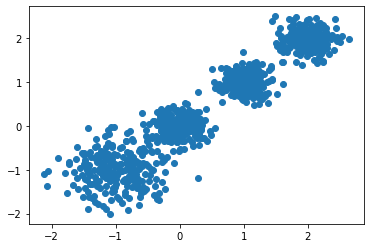

In [2]:
# 生成数据集
X,y = make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],
                cluster_std=[0.4,0.2,0.2,0.2],random_state=9)
# 生成数据散点图
plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

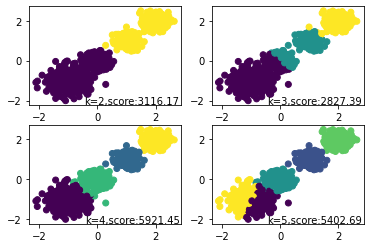

In [4]:
# 可视化
for index,k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred=MiniBatchKMeans(n_clusters=k,batch_size=200,random_state=9).fit_predict(X)
    score=metrics.calinski_harabasz_score(X,y_pred)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(.99,.01,('k=%d,score:%.2f'%(k,score)),
            transform=plt.gca().transAxes,size=10,
            horizontalalignment='right')
# 显示图像
plt.show()

`AttributeError`: module 'sklearn.metrics' has no attribute 'calinski_harabaz_score'

原因：版本问题

解决方法：升级`pip install scikit-learn`

`warning`：Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

解决方法：`score=metrics.calinski_harabaz_score(X,y_pred)`改成`score=metrics.calinski_harabasz_score(X,y_pred)`

<hr style="FILTER:alpha(opacity=100,finishopacity=0,style=3)" width="100%"color=#08D463; SIZE=1></hr>

本文作者：lfdx

写作日期：2022-10-12

本博客所有文章除特别声明外，均采用 **CC BY-NC-SA** 许可协议。转载请注明出处！

<hr style="FILTER:alpha(opacity=100,finishopacity=0,style=3)" width="100%"color=#08D463; SIZE=1></hr>